**Librerías**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import seaborn as sns
import math

**Extracción y modificación de datos**

In [5]:
df = pd.read_csv('forestfires.csv')

In [6]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


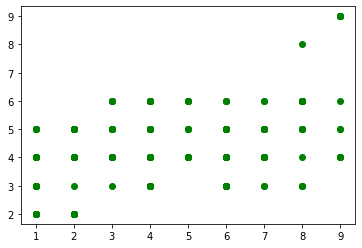

In [7]:
plt.plot(df['X'], df['Y'], 'go')

In [8]:
df['area'].skew()

12.846933533934868

<AxesSubplot:xlabel='area', ylabel='Count'>

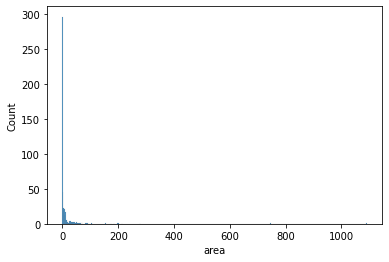

In [9]:
sns.histplot(data = df['area'])

In [10]:
print(min(df['area']))
print(max(df['area']))
df['area'] = np.log(1 + df['area'])
df['area'] = df['area'].replace(-np.inf, 0)


0.0
1090.84


<AxesSubplot:xlabel='area', ylabel='Count'>

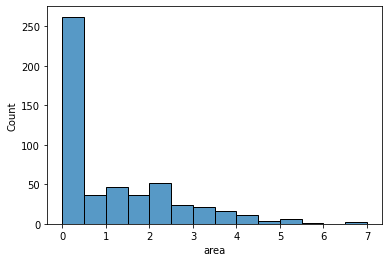

In [11]:
sns.histplot(data = df['area'])

In [12]:
df['FFMC'] = NormalizeData(df['FFMC'])
df['DMC'] = NormalizeData(df['DMC'])
df['DC'] = NormalizeData(df['DC'])
df['ISI'] = NormalizeData(df['ISI'])
df['RH'] = NormalizeData(df['RH'])
#df['area'] = NormalizeData(df['area'])

In [13]:
day_df = {'mon':1, 'tue':2, 'wed':3, 'thu':4,'fri':5,'sat':6,'sun':7}
month_df = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df2=df
df2['day']=df2['day'].map(day_df)
df2['month']=df2['month'].map(month_df)
df2.shape

(517, 13)

<AxesSubplot:xlabel='area', ylabel='Count'>

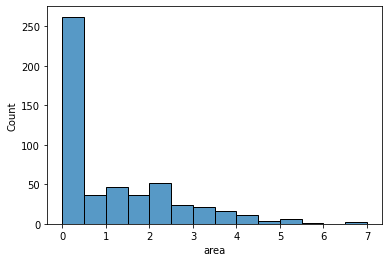

In [14]:
sns.histplot(data = df['area'])

In [15]:
dfX = df.iloc [:,:-1]

In [16]:
df2

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,0.870968,0.086492,0.101325,0.090909,8.2,0.423529,6.7,0.0,0.000000
1,7,4,10,2,0.927742,0.118194,0.775419,0.119430,18.0,0.211765,0.9,0.0,0.000000
2,7,4,10,6,0.927742,0.146795,0.796294,0.119430,14.6,0.211765,1.3,0.0,0.000000
3,8,6,3,5,0.941935,0.110958,0.081623,0.160428,8.3,0.964706,4.0,0.2,0.000000
4,8,6,3,7,0.910968,0.172984,0.110590,0.171123,11.4,0.988235,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,0.811613,0.191592,0.771315,0.033868,27.8,0.200000,2.7,0.0,2.006871
513,2,4,8,7,0.811613,0.191592,0.771315,0.033868,21.9,0.658824,5.8,0.0,4.012592
514,7,4,8,7,0.811613,0.191592,0.771315,0.033868,21.2,0.647059,6.7,0.0,2.498152
515,1,4,8,6,0.976774,0.499311,0.711622,0.201426,25.6,0.317647,4.0,0.0,0.000000


In [17]:
dfY = df.iloc [:,-1]

In [18]:
dfY.shape

(517,)

In [19]:
dfY

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    2.006871
513    4.012592
514    2.498152
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float64

Separación del dataframe para el entrenamiento

In [20]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(dfX, dfY, test_size=0.3)
Xvalidate, Xtest, Yvalidate, Ytest = train_test_split(Xtest, Ytest, test_size=0.33)

In [21]:
Xtrain.transpose().shape

(12, 361)

In [22]:
Ytrain.shape

(361,)

In [23]:
np.dot(Xtrain.transpose(), Ytrain).shape

(12,)

Funciones para la hipótesis, calculo del error y entrenamiento del modelo

In [24]:
def hipotesis (X, W, b):
  return (np.dot(X,W)) + b

In [25]:
def computeCost(X,Y,W,b):
  m=len(Y)
  predictions = hipotesis(X,W,b)
  square_err=(predictions - Y)
  square_err = np.power(square_err,2)
  
  return 1/(2*m) * np.sum(square_err)

In [31]:
def training (Xt, Yt, Xv, Yv, W, b, alpha, epochs):
  m = len(Yt)
  J_history = []
  J_test_history = []
  for i in range (epochs):
    predictions = hipotesis (Xt, W, b)
    error = np.dot(Xt.transpose(),(predictions - Yt))
    errorb = np.sum(predictions - Yt)
    descent=alpha * 1/m * error
    descent=np.squeeze(np.asarray(descent)  )
    descentb=alpha * 1/m * errorb
    W = W - descent
    b-=descentb
    J_history.append(computeCost(Xt,Yt,W,b))
    J_test_history.append(computeCost(Xv,Yv,W,b))
  return W, b, J_history, J_test_history

Resultados

In [32]:
initial_theta = np.random.rand(12)
initial_b = np.random.rand(1)

In [33]:
initial_theta

array([0.20395819, 0.15562242, 0.16247243, 0.48900275, 0.64923315,
       0.38921892, 0.4387087 , 0.69653192, 0.2377922 , 0.71109509,
       0.81004159, 0.06297539])

In [34]:
tw, tb, j, jh = training(Xtrain,Ytrain,Xvalidate,Yvalidate,initial_theta,initial_b,0.001,23)

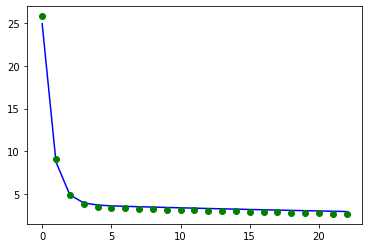

In [35]:
plt.plot(j,'b')
plt.plot(jh,'go')

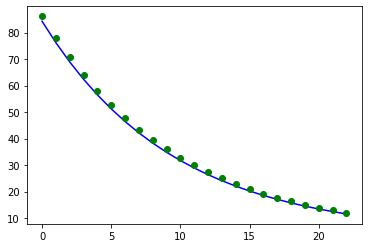

In [52]:
tw, tb, j, jh = training(Xtrain,Ytrain,Xvalidate,Yvalidate,initial_theta,initial_b,0.0001,23)
plt.plot(j,'b')
plt.plot(jh,'go')

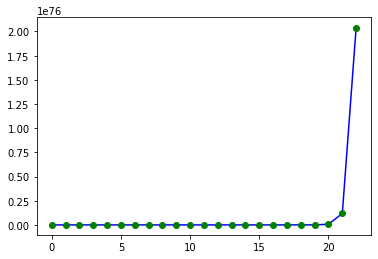

In [55]:
tw, tb, j, jh = training(Xtrain,Ytrain,Xvalidate,Yvalidate,initial_theta,initial_b,0.01,23)
plt.plot(j,'b')
plt.plot(jh,'go')

Error del modelo con el test

In [37]:
computeCost(Xtest,Ytest,tw,tb)

3.1243840643065774